# Laboratorio Introducción al Deep Learning:  
## ¿A dónde realizan su primera reserva los nuevos usuarios de Airbnb?

### Armado de un esquema de aprendizaje automático:

En el presente laboratorio se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación. El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

__HINT__: A modo de ayuda, se agrega la notebook `Intro_Deep_Learning_EXAMPLES.ipynb` para que puedan ver distintos modelos y como usarlos en problemas de clasificación binaria y multiclase.

---
## Librerías y Semilla

In [57]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from ml.visualization import plot_confusion_matrix, classifier_boundary
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import axes3d

#Semilla
np.random.seed(3)

---
## Carga de datos

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [58]:
dataset = pd.read_csv("../Datos/data_cleaned.csv", comment="#")
print('\nLongitud del dataset: '+str(len(dataset))+'\n')

#División entre instancias y etiquetas
X, y = dataset.drop(columns=['country_destination']), dataset.country_destination

print('Dataset:')
display(X.head(10))
print(" ")
print('Target:')
display(y.head(10))
print("----------------------------------------")
print('Frecuencias del Target')
display(dataset.country_destination.value_counts())


Longitud del dataset: 207386

Dataset:


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,gxn3p5htnn,2010-06-28 00:00:00,2009-03-19 04:32:55,NaN,-unknown-,49.307715,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,820tgsjxq7,2011-05-25 00:00:00,2009-05-23 17:48:09,NaN,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,4ft3gnwmtx,2010-09-28 00:00:00,2009-06-09 23:12:47,2010-08-02 00:00:00,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,bjjt8pjhuk,2011-12-05 00:00:00,2009-10-31 06:01:29,2012-09-08 00:00:00,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,87mebub9p4,2010-09-14 00:00:00,2009-12-08 06:11:05,2010-02-18 00:00:00,-unknown-,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
5,osr2jwljor,2010-01-01 00:00:00,2010-01-01 21:56:19,2010-01-02 00:00:00,-unknown-,49.307715,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome
6,lsw9q7uk0j,2010-01-02 00:00:00,2010-01-02 01:25:58,2010-01-05 00:00:00,FEMALE,46.000000,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari
7,0d01nltbrs,2010-01-03 00:00:00,2010-01-03 19:19:05,2010-01-13 00:00:00,FEMALE,47.000000,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari
8,a1vcnhxeij,2010-01-04 00:00:00,2010-01-04 00:42:11,2010-07-29 00:00:00,FEMALE,50.000000,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari
9,6uh8zyj2gn,2010-01-04 00:00:00,2010-01-04 02:37:58,2010-01-04 00:00:00,-unknown-,46.000000,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox


 
Target:


0      NDF
1      NDF
2       US
3    other
4       US
5       US
6       US
7       US
8       US
9       US
Name: country_destination, dtype: object

----------------------------------------
Frecuencias del Target


NDF      120216
US        61067
other      9981
FR         4899
IT         2791
GB         2295
ES         2213
CA         1391
DE         1041
NL          751
AU          527
PT          214
Name: country_destination, dtype: int64

Como podemos observar el problema de aprendizaje autómatico del corriente laboratorio, entra dentro del problema de `clasificación multiclase`.

__TODO__: Curar los datos.

In [59]:
dataset.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28 00:00:00,2009-03-19 04:32:55,NaN,-unknown-,49.307715,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25 00:00:00,2009-05-23 17:48:09,NaN,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28 00:00:00,2009-06-09 23:12:47,2010-08-02 00:00:00,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05 00:00:00,2009-10-31 06:01:29,2012-09-08 00:00:00,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14 00:00:00,2009-12-08 06:11:05,2010-02-18 00:00:00,-unknown-,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [60]:
#GENDER
#dataset['gender'].unique()
#dataset['gender'] = dataset['gender'].replace('-unknown-', np.nan)
dataset['gender'].value_counts()
#len(dataset[dataset['gender'].isnull()]) #91783 null

-unknown-    91783
FEMALE       61978
MALE         53347
OTHER          278
Name: gender, dtype: int64

In [61]:
#AGE
#dataset[dataset['age']>100] # 0
#dataset[dataset['age']<18] # 0
dataset['age'].describe()

count    207386.000000
mean         41.774535
std          10.880173
min          18.000000
25%          32.000000
50%          48.000000
75%          49.307715
max         100.000000
Name: age, dtype: float64

In [62]:
#first_browser
dataset.first_browser.unique()
#dataset[dataset['first_browser'].isnull()] # 0 nan
#dataset['first_browser'] = dataset['first_browser'].replace('-unknown-', np.nan)
dataset['first_browser'].value_counts()

Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               21201
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
Apple Mail                 36
IE Mobile                  36
Sogou Explorer             33
Mobile Firefox             30
RockMelt                   24
SiteKiosk                  24
Iron                       17
IceWeasel                  13
Pale Moon                  12
SeaMonkey                  11
CometBird                  11
Yandex.Browser             11
Camino                      9
TenFourFox                  8
wOSBrowser                  6
CoolNovo                    6
Avant Browser               4
Opera Mini                  4
Mozilla                     3
SlimBrowse

In [63]:
#dataset.signup_method.unique()
#dataset.first_device_type.unique()
#dataset[dataset['first_device_type'].isnull()] # 0 nan

dataset['first_device_type'].value_counts()

Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown          4602
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: first_device_type, dtype: int64

__TODO__: Determinar el set de features que vas a usar.
### Features
1-age : Rango de edades \
2-gender : MALE/FEMALE/OTHER/UNKNOWN \
3-signup_method : 'facebook'|'basic'|'google' \ 
4-first_device_type : Mac Desktop|Windows Desktop|iPhone|iPad|Other/Unknown|Android Phone|Android Tablet|Desktop (Other)|SmartPhone (Other) \
5-first_browser(?: (first 7) Chrome | Safari | Firefox | IE | Mobile Safari | Chrome Mobile | Android Browser \

In [64]:
dataset.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28 00:00:00,2009-03-19 04:32:55,NaN,-unknown-,49.307715,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25 00:00:00,2009-05-23 17:48:09,NaN,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28 00:00:00,2009-06-09 23:12:47,2010-08-02 00:00:00,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05 00:00:00,2009-10-31 06:01:29,2012-09-08 00:00:00,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14 00:00:00,2009-12-08 06:11:05,2010-02-18 00:00:00,-unknown-,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01 00:00:00,2010-01-01 21:56:19,2010-01-02 00:00:00,-unknown-,49.307715,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02 00:00:00,2010-01-02 01:25:58,2010-01-05 00:00:00,FEMALE,46.000000,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03 00:00:00,2010-01-03 19:19:05,2010-01-13 00:00:00,FEMALE,47.000000,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04 00:00:00,2010-01-04 00:42:11,2010-07-29 00:00:00,FEMALE,50.000000,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04 00:00:00,2010-01-04 02:37:58,2010-01-04 00:00:00,-unknown-,46.000000,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


__TODO__: ¿Es una dataset balanceado? ¿Cuál es su implicancia y que podemos hacer con ello?

In [65]:
dataset[dataset['country_destination'].isnull()]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination


In [66]:
dataset['country_destination'].value_counts()

NDF      120216
US        61067
other      9981
FR         4899
IT         2791
GB         2295
ES         2213
CA         1391
DE         1041
NL          751
AU          527
PT          214
Name: country_destination, dtype: int64

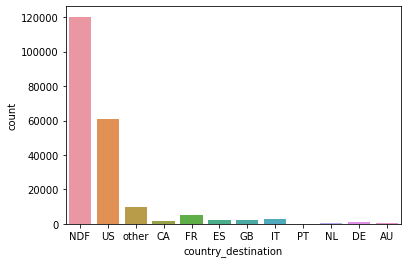

In [67]:
sns.countplot(data=dataset, x='country_destination')

In [68]:
df_uniques = dataset.set_index('id').drop_duplicates()
print(dataset.shape)
print(df_uniques.shape)

(207386, 16)
(207386, 15)


No hay registros duplicados.


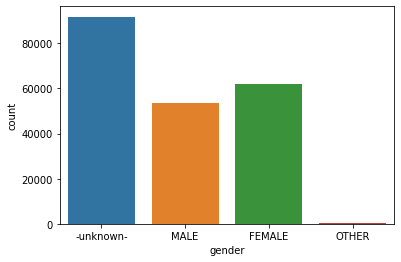

In [69]:
sns.countplot(data=dataset, x='gender')

### Fix timestamps and datetype

In [70]:
dcol = ['date_account_created','timestamp_first_active','date_first_booking']

for i in dcol:
    if 'timestamp' not in i:
        dataset[i] = pd.to_datetime(dataset[i],format= '%Y-%m-%d')
    else:
        dataset[i] = pd.to_datetime(dataset[i],format='%Y-%m-%d %H:%M:%S') 

### Date_first_booking and country_destination
Se puede confirmar que los destinos en NDF siempre pertenecen o aparecen frente a un date_first_booking nulo.

In [71]:
a = dataset[(dataset['date_first_booking'].isna() == True) & (dataset['country_destination'] != 'NDF')]
b = dataset[(dataset['date_first_booking'].isna() == False) & (dataset['country_destination'] == 'NDF')]
print(a)
print(b)

Empty DataFrame
Columns: [id, date_account_created, timestamp_first_active, date_first_booking, gender, age, signup_method, signup_flow, language, affiliate_channel, affiliate_provider, first_affiliate_tracked, signup_app, first_device_type, first_browser, country_destination]
Index: []
Empty DataFrame
Columns: [id, date_account_created, timestamp_first_active, date_first_booking, gender, age, signup_method, signup_flow, language, affiliate_channel, affiliate_provider, first_affiliate_tracked, signup_app, first_device_type, first_browser, country_destination]
Index: []


#### El dataset no es balanceado (como la mayoria de los casos) debido a que la mayoria de personas no ha realizado reserva alguna y figuran como NDF en country_destination. Para el resto de las personas que hicieron reservas se observa la mayor cantidad de personas con pais de destino US, mientras que los demas paises si los juntamos sumando sus totales llegan casi a la mitad de personas que reservan en US.

#### Existen estrategias varias para afrontar un dataset desbalanceado. (https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb). Los metodos vistos son Resampling (Oversampling and Undersampling) y Ensembling Methods.

### Feature Correlation
La matriz de correlacion nos mostrara entre las diferentes variables del dataset. Cada celda de la tabla muestra la correlacion que existe entre dos variables. Esta matriz se utiliza para sumarizar los datas y encontrar el QUE, que servira de input para entrar en un analisis avanzado.

Primero que nada necesitamos pasar las variables categoricas a numericas.

In [50]:
# sklearn.preprocessing.LabelEncoder
le = preprocessing.LabelEncoder()
df_le = dataset
for col in df_le.columns :
    if col not in ('id','age','signup_flow','date_account_created','timestamp_first_active', 'date_first_booking'):
        le.fit(df_le[col])
        print(f'{le.classes_}{le.transform(le.classes_)}')
        df_le[col]=le.transform(df_le[col])


['-unknown-' 'FEMALE' 'MALE' 'OTHER'][0 1 2 3]
['basic' 'facebook' 'google'][0 1 2]
['ca' 'cs' 'da' 'de' 'el' 'en' 'es' 'fi' 'fr' 'hr' 'hu' 'id' 'is' 'it'
 'ja' 'ko' 'nl' 'no' 'pl' 'pt' 'ru' 'sv' 'th' 'tr' 'zh'][ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
['api' 'content' 'direct' 'other' 'remarketing' 'sem-brand'
 'sem-non-brand' 'seo'][0 1 2 3 4 5 6 7]
['baidu' 'bing' 'craigslist' 'daum' 'direct' 'email-marketing' 'facebook'
 'facebook-open-graph' 'google' 'gsp' 'meetup' 'naver' 'other' 'padmapper'
 'vast' 'wayn' 'yahoo' 'yandex'][ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
['linked' 'local ops' 'marketing' 'omg' 'product' 'tracked-other'
 'untracked'][0 1 2 3 4 5 6]
['Android' 'Moweb' 'Web' 'iOS'][0 1 2 3]
['Android Phone' 'Android Tablet' 'Desktop (Other)' 'Mac Desktop'
 'Other/Unknown' 'SmartPhone (Other)' 'Windows Desktop' 'iPad' 'iPhone'][0 1 2 3 4 5 6 7 8]
['-unknown-' 'AOL Explorer' 'Android Browser' 'Apple Mail' 'Arora'
 'Avant Brow

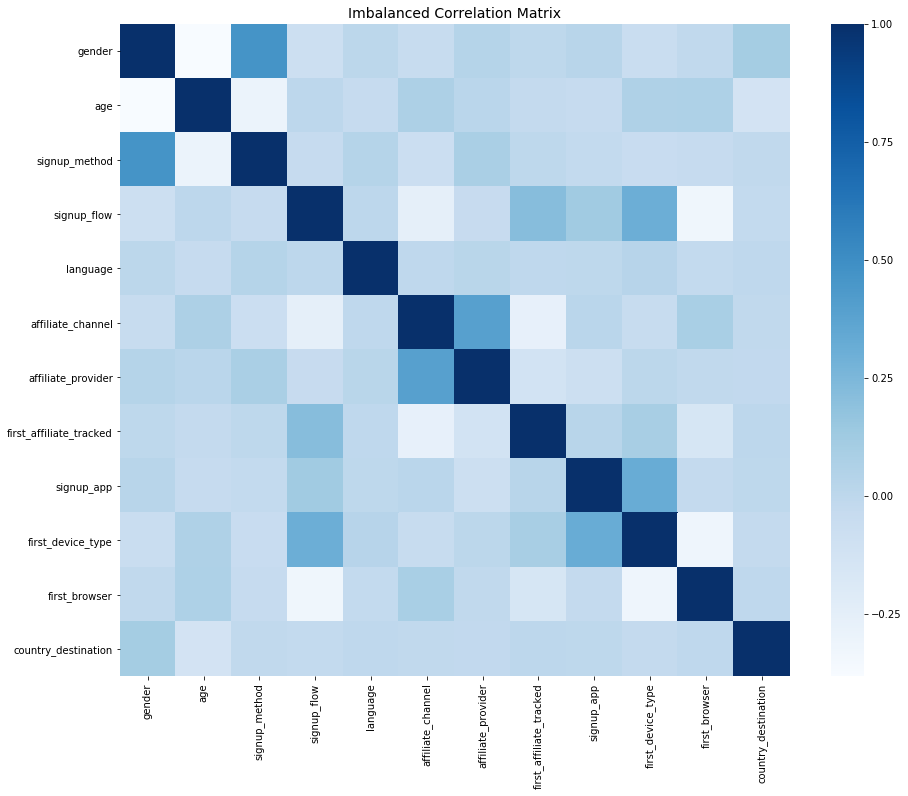

In [51]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(15,12))   
# Imbalanced DataFrame Correlation
corr = df_le.corr()
sns.heatmap(corr, cmap='Blues', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)

plt.show()

#### El heatmap muestra unas posibles relaciones. Por ejemplo entre el metodo de registracion y el genero, entre affiliate_provider y el affiliate_channel, o entre signup_app y  first_device_type.

---
## Ejercicio 1: División de datos en conjuntos de entrenamiento y evaluación

La primer tarea consiste en dividir el conjunto de datos cargados en el apartado anterior en conjuntos de entrenamiento (o `training`) y evaluación (o `test`). El primero será utilizado para la creación/selección del modelo de clasificación. El segundo se utilizará sólo al final (una vez elegidos los mejores hiperparámetros) para ver cuál es el resultado final del modelo sobre un conjunto de datos independiente.

material de apoyo(https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)

In [52]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

#define the target variable
y = df_le.country_destination

In [53]:
#create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_le, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(165908, 16) (165908,)
(41478, 16) (41478,)


#### 

---
## Ejercicio 2: Elección de un modelo

Basándose en lo visto en el teórico escojan y justifiquen un modelo de aprendizaje automático. Recuerden que los pasos para elegir un modelo son:

1. Selección de hipótesis.
2. Selección de regularizador.
3. Selección de función de coste.

__TODO__: Justifica tus selecciones anteriores.

__HINT__: Deben tener en cuenta que __NO__ se trata de una `clasificación binaria`.

1- Hipotesis nula: No existe relacion entre la plataforma usada para registrarse y el genero. \
   Hipotesis alternativa: Existe relacion entre la plataforma usada para registrarse y el genero.
   
Se asume un nivel de significacion alpha = 0.05

In [105]:
df_2genders = dataset.drop(dataset[dataset['gender'] == '-unknown-'].index)

In [106]:
df_2genders = df_2genders.drop(dataset[dataset['gender'] == 'OTHER'].index)

In [117]:
df_2genders.gender.nunique()

2

In [118]:
obs = df_2genders.pivot_table('id',['gender'], 'signup_method', aggfunc='count').reset_index()
del obs.columns.name
obs = obs.set_index('gender')
obs

,basic,facebook,google
gender,,,
FEMALE,32466,29480,32
MALE,25641,27637,69


### Chi cuadrada

In [119]:
from scipy import stats
chi2, p, dof, expected = stats.chi2_contingency(obs)

In [123]:
chi2, dof, p

(229.99650403657452, 2, 1.139970781044285e-50)

Segun los valores de p y significancia debemos rechazar la hipotesis nula. Por lo tanto Existe relacion entre la plataforma usada para registrarse y el genero.

In [55]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

ValueError: could not convert string to float: 'x8g92lpfpf'

---
## Ejercicio 3: Selección de hiperparámetros

Utilizando búsqueda exhaustiva (`grid search`) y métrica del área bajo la curva de ROC (o *ROC-AUC*), hagan una selección de los mejores hiperparámetros para su conjunto de datos y el modelo que hayan elegido en el apartado anterior.

---
## Ejercicio 4: Métricas sobre el conjunto de evaluación

Una vez encontrados los mejores hiperparámetros para el modelo seleccionado en los apartados anteriores se evalúa el modelo final entrenado sobre el conjunto de datos de evaluación seleccionado en el __Ejercicio 1__. 

* Pueden utilizar las métricas que crean convenientes. 
* Es mejor utilizar más de una métrica. 
* Particularmente el __reporte de clasificación__ y la __matriz de confusión__ son buenos ejemplos de métricas.

---
## Ejercicio 5 (opcional): Curvas de ROC

Como ejercicio adicional (opcional), pueden redefinir el umbral de decisión óptimo del problema a partir de los resultados que muestren curvas de ROC como justificación. 

Pueden ver esto mediante la [graficación de las curvas de ROC](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html). En el link que se les brinda se muestra como hacer para graficar curvas de ROC para problemas multiclase. 

---
## ¿Conclusiones?